# Hipótesis Primera

Se ha realizado un pequeño cambio en la hipótesis presentada al inicio.
Finalmente se decide estudiar si **en los últimos años se ha producido un cambio significativo en los patrones del viento y las lluvias** y la **relación viento-lluvia**.

## Primera observación y limpieza de los datos
<br>

In [1]:
# Librerías necesarias en primera instancia
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Para los mapas, se puede utilizar la librería 'geopandas':
#http://www.geomapik.com/desarrollo-programacion-gis/mapas-con-python-geopandas-matplotlib/

# Mapas avanzados con plotly
# http://www.geomapik.com/desarrollo-programacion-gis/mapas-plotly-visualizacion-datos-espaciales/

#Dashboard tutorial
#https://www.youtube.com/watch?v=bDXypNBH1uw

In [2]:
# Cargo el csv de los datos sobre las lluvias en Australia
aus_df = pd.read_csv('../data/weatherAUS.csv', encoding='latin1')
aus_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# Utilizo los métodos de info() y describe() para obtener información del dataset a grandes rasgos
aus_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [4]:
print('Tamaño del dataset: ', aus_df.shape, '\n\n')
aus_df.info()

Tamaño del dataset:  (145460, 23) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float

In [5]:
aus_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Text(0.5, 1.0, 'Missing data')

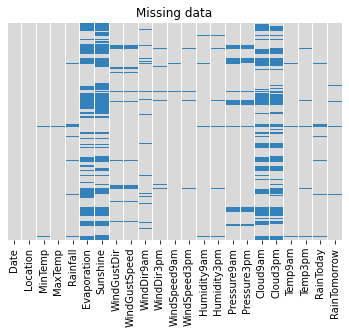

In [6]:
# Se genera un gráfico para facilitar la visualización de la distribución de lo nulos
sns.heatmap(aus_df.isnull(), yticklabels = False, cbar = False, cmap='tab20c_r')
plt.title('Missing data')

In [7]:
# Como complemento al gráfico, se crea un dataframe para obtener datos numéricos sobre la distribución de los missing data.
# ELos indices de este dataframe son las columnas del DataFrame sobre las lluvias en Australia (aus_df).
# En la primera columna se muestra el número total de nulos, y en la segunda, el porcentaje respecto al numero total de filas.
pd.DataFrame({'Nuls':pd.Series(aus_df.isnull().sum()).sort_values(ascending = False),
              '%': round((pd.Series(aus_df.isnull().sum()).sort_values(ascending = False)/aus_df.shape[0])*100, 2)})

,Nuls,%
Sunshine,69835,48.01
Evaporation,62790,43.17
Cloud3pm,59358,40.81
Cloud9am,55888,38.42
Pressure9am,15065,10.36
Pressure3pm,15028,10.33
WindDir9am,10566,7.26
WindGustDir,10326,7.10
WindGustSpeed,10263,7.06
Humidity3pm,4507,3.10


Con el gráfico y el DataFrame generados, se observan gran cantidad de nulos en las siguientes columnas:
* Sunshine
* Evaporation
* Cloud3pm
* Cloud9am

Por el momento, estas columnas no afecta al desarrollo del EDA para el análisis de la hipótesis.

## ¿En qué zonas del país se ha llevado a cabo la recogida de datos? ¿En qué periodos?

In [8]:
meassure_locs = aus_df.Location.unique().tolist()
print(meassure_locs)
len(meassure_locs)

['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns', 'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine', 'Uluru']


49

In [9]:
aus_df['Date'] #Importar de la página web Australiana los datos correspondientes a estas fechas

0         2008-12-01
1         2008-12-02
2         2008-12-03
3         2008-12-04
4         2008-12-05
             ...    
145455    2017-06-21
145456    2017-06-22
145457    2017-06-23
145458    2017-06-24
145459    2017-06-25
Name: Date, Length: 145460, dtype: object

Es bueno también, conocer el número mediciones por localización:

In [10]:
aus_df.groupby('Location').count()[['Date']] 
# Se muestra solo esta columna porque, como se mostró anteriormente, no existen nulos en esta columna

,Date
Location,
Adelaide,3193
Albany,3040
Albury,3040
AliceSprings,3040
BadgerysCreek,3009
Ballarat,3040
Bendigo,3040
Brisbane,3193
Cairns,3040


In [11]:
city =aus_df.Location.unique().tolist()
city
#Esta lista la utilizaré para crear un diccinario con las coordenadas

['Albury',
 'BadgerysCreek',
 'Cobar',
 'CoffsHarbour',
 'Moree',
 'Newcastle',
 'NorahHead',
 'NorfolkIsland',
 'Penrith',
 'Richmond',
 'Sydney',
 'SydneyAirport',
 'WaggaWagga',
 'Williamtown',
 'Wollongong',
 'Canberra',
 'Tuggeranong',
 'MountGinini',
 'Ballarat',
 'Bendigo',
 'Sale',
 'MelbourneAirport',
 'Melbourne',
 'Mildura',
 'Nhil',
 'Portland',
 'Watsonia',
 'Dartmoor',
 'Brisbane',
 'Cairns',
 'GoldCoast',
 'Townsville',
 'Adelaide',
 'MountGambier',
 'Nuriootpa',
 'Woomera',
 'Albany',
 'Witchcliffe',
 'PearceRAAF',
 'PerthAirport',
 'Perth',
 'SalmonGums',
 'Walpole',
 'Hobart',
 'Launceston',
 'AliceSprings',
 'Darwin',
 'Katherine',
 'Uluru']

In [12]:
print(aus_df.RainToday.value_counts())
print(aus_df.RainTomorrow.value_counts())

#Compruebo que solo tenga Yes y No

No     110319
Yes     31880
Name: RainToday, dtype: int64
No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


In [13]:
#Modifico los datos de las columnas de RainToday y RainTomorrow
aus_df.loc[aus_df['RainToday']=='Yes','RainToday'] = 1
aus_df.loc[aus_df['RainToday']=='No','RainToday'] = 0
aus_df.loc[aus_df['RainTomorrow']=='Yes','RainTomorrow'] = 1
aus_df.loc[aus_df['RainTomorrow']=='No','RainTomorrow'] = 0

In [14]:
aus_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [15]:
#Compruebo que los numeros coinciden
print(aus_df.RainToday.value_counts())
print(aus_df.RainTomorrow.value_counts())

0    110319
1     31880
Name: RainToday, dtype: int64
0    110316
1     31877
Name: RainTomorrow, dtype: int64


## Fechas

In [16]:
from datetime import datetime
print('Tipo de dato en la columna fecha:', type(aus_df.loc[2,'Date']))
aus_df['Date']=pd.to_datetime(aus_df['Date'])
print('Tipo de dato en la columna fecha después de la transformación:', type(aus_df.loc[2,'Date']))
aus_df['Year'] = aus_df['Date'].dt.year
aus_df['Month'] = aus_df['Date'].dt.month


Tipo de dato en la columna fecha: <class 'str'>
Tipo de dato en la columna fecha después de la transformación: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [17]:
# Pongo la columna Date como índice
aus_df.index = aus_df['Date']
aus_df.drop('Date', axis = 1, inplace = True)

In [18]:
aus_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,2008,12
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,2008,12
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,2008,12
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,2008,12
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12


## Viento

In [19]:
aus_df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

Con los datos disponibles se puede obtener información sobre la dirección mayoritaria del viento en Australia y por localización

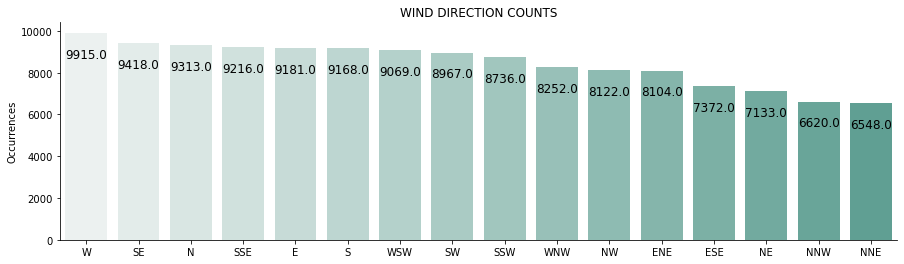

In [20]:
f, ax = plt.subplots(figsize = (15,4))

ax = sns.barplot(x = aus_df.WindGustDir.value_counts().index,
                 y = aus_df.WindGustDir.value_counts(),
                 palette='light:#5A9')

ax.set(title = 'WIND DIRECTION COUNTS', ylabel = 'Occurrences')

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='top', color='black', size=12)

    sns.despine()

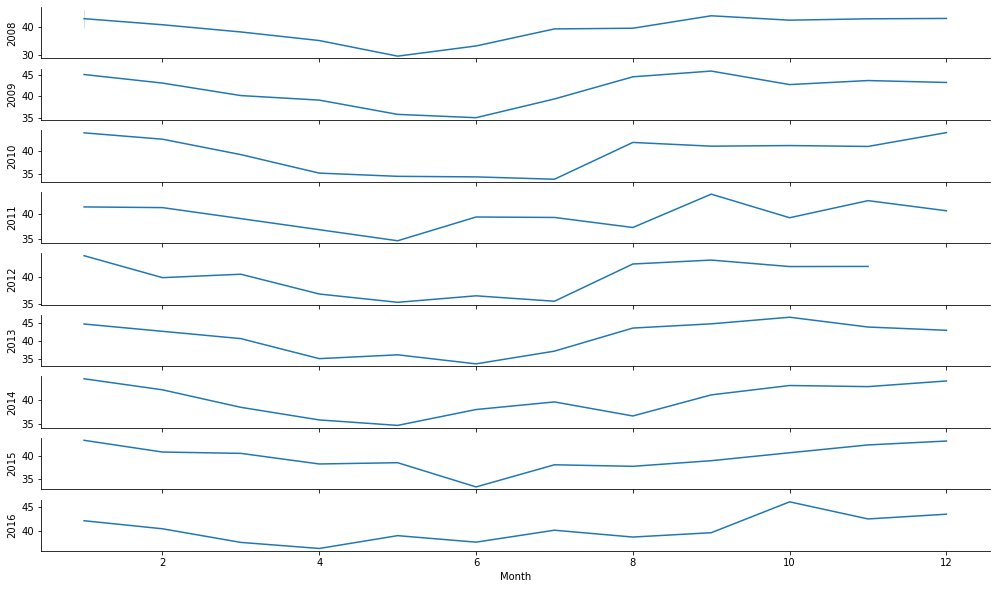

In [40]:
fig, ax = plt.subplots(len(range(aus_df.Year.min()+1,aus_df.Year.max())), figsize = (17,10), sharex=True)

for n, year in enumerate(range(aus_df.Year.min()+1,aus_df.Year.max())):
    ax[n]=sns.lineplot(x = aus_df.loc[aus_df['Year']==year,'Month'],
                       y = aus_df.loc[aus_df['Year']==year,'WindGustSpeed'],
                       ax=ax[n])
    ax[n].set(ylabel = str(year))
    sns.despine()

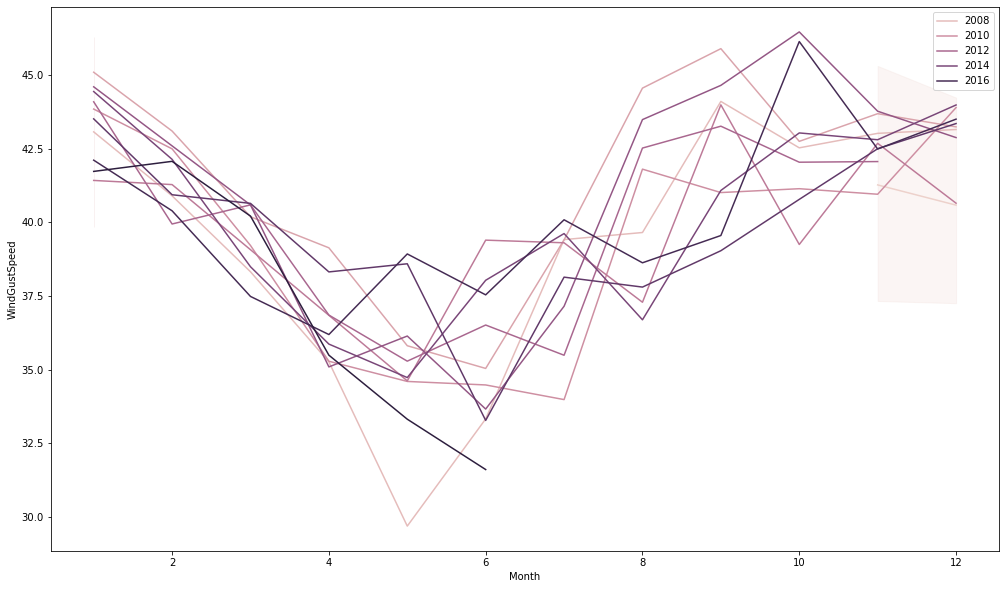

In [43]:
fig, ax = plt.subplots(figsize = (17,10), sharex=True)
sns.lineplot(x = aus_df.Month, y = aus_df.WindGustSpeed, hue=aus_df.Year)
    
ax.legend()

## Lluvia

## Relación lluvia viento

In [22]:
for i in range(2008,2018):
    print(i)

2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


In [23]:
for n, mes in enumerate(range(aus_df.Year.min(),aus_df.Year.max())):
    print(n, mes)

0 2007
1 2008
2 2009
3 2010
4 2011
5 2012
6 2013
7 2014
8 2015
9 2016
